In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"]=(10,10)


userows = [*range(0, 750, 4)]
df_expect = pd.read_excel("/Users/silas/Documents/College/"
                        "Spring 2022/Anthro Homework Research/Homework 2/life_expect.xlsx",
                        skiprows = lambda x: x not in userows, usecols = [1,3])

df_expect.rename(columns={'Unnamed: 1':'country'}, inplace=True)
df_expect.rename(columns={'Unnamed: 3':'expectancy'}, inplace=True)                         
df_expect

,country,expectancy
0,Afghanistan,63.2
1,Albania,78.0
2,Angola,63.1
3,Antigua and Barbuda,76.5
4,Argentina,76.6
...,...,...
168,Uzbekistan,73.0
169,Vanuatu,65.3
170,Vietnam,73.7
171,Zambia,62.5


In [10]:
df_gdp =  pd.read_excel("/Users/silas/Documents/College/Spring 2022/Anthro Homework "
                      "Research/Homework 2/GDP.xlsx", usecols = [0,2])
df_gdp.rename(columns={'2019':'GDP'}, inplace=True)
df_gdp['log_GDP'] = np.log(df_gdp['GDP'])
df_gdp

,country,GDP,log_GDP
0,Afghanistan,494.179350,6.202899
1,Albania,5395.659532,8.593350
2,Angola,2809.626088,7.940807
3,Antigua and Barbuda,17376.649677,9.762883
4,Argentina,10056.637940,9.215988
...,...,...,...
168,Uzbekistan,1784.009816,7.486619
169,Vanuatu,3116.297759,8.044401
170,Vietnam,2715.275980,7.906649
171,Zambia,1305.001031,7.173959


In [21]:
merge = pd.merge(df_expect, df_gdp, on='country')
reorder = merge[["country", "GDP", "log_GDP", "expectancy"]]
print(reorder)

                 country           GDP   log_GDP  expectancy
0            Afghanistan    494.179350  6.202899        63.2
1                Albania   5395.659532  8.593350        78.0
2                 Angola   2809.626088  7.940807        63.1
3    Antigua and Barbuda  17376.649677  9.762883        76.5
4              Argentina  10056.637940  9.215988        76.6
..                   ...           ...       ...         ...
167           Uzbekistan   1784.009816  7.486619        73.0
168              Vanuatu   3116.297759  8.044401        65.3
169              Vietnam   2715.275980  7.906649        73.7
170               Zambia   1305.001031  7.173959        62.5
171             Zimbabwe   1316.740657  7.182915        60.7

[172 rows x 4 columns]


In [22]:
fit = ols('expectancy ~ log_GDP', data=reorder).fit()

print(fit.summary())
print(fit.params)

                            OLS Regression Results                            
Dep. Variable:             expectancy   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     366.2
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.90e-44
Time:                        11:32:46   Log-Likelihood:                -484.90
No. Observations:                 172   AIC:                             973.8
Df Residuals:                     170   BIC:                             980.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.2036      1.928     18.775      0.0

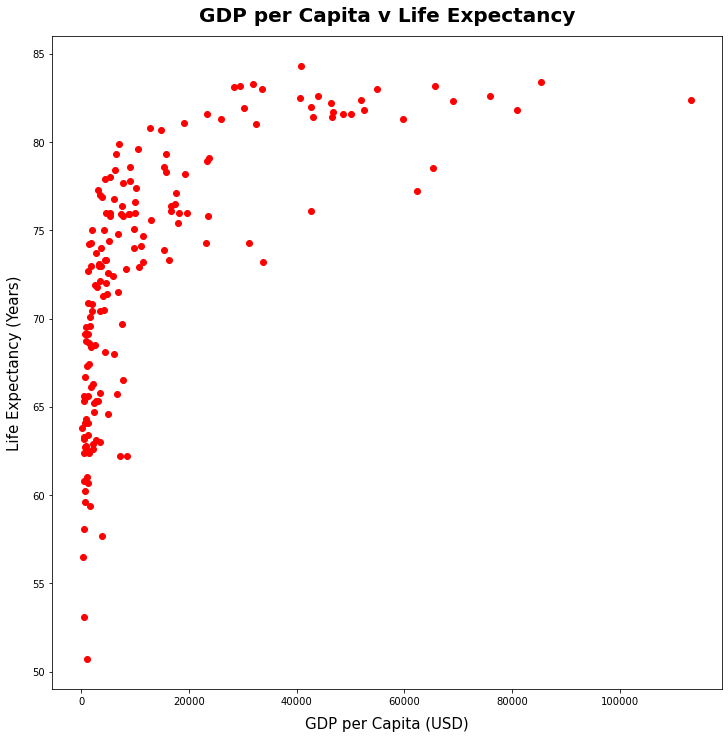

In [32]:
GDP = df_gdp.GDP
log_GDP = df_gdp.log_GDP

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
#abline(4.2082, 36.2036)

expect = df_expect.expectancy
#plt.xticks(ticks=[*range(0, 120000, 10000)])
#plt.plot(np.unique(GDP), np.poly1d(np.polyfit(GDP, expect, 1))(np.unique(GDP)), color="black")

plt.title(('GDP per Capita v Life Expectancy'), fontsize=20, fontweight='bold', pad=15)
plt.xlabel(('GDP per Capita (USD)'), fontsize=15, labelpad=10)
plt.ylabel(('Life Expectancy (Years)'), fontsize=15, labelpad=10)
plt.scatter(x=GDP, y=expect, color="r")

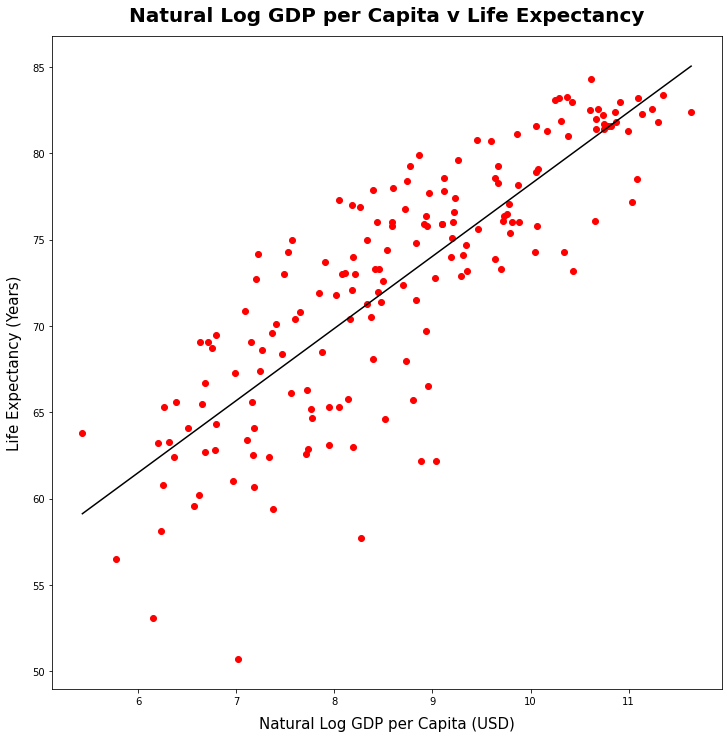

In [41]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

#a = [pow(10, i) for i in range(10)]

#fig = plt.figure()
#ax = fig.add_subplot(2, 1, 1)

#ax.set_xscale('log')
#log_GDP = np.log(GDP)

plt.rcParams["figure.figsize"]=(12,12)

#abline(.0002, 69)

#ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#bins = [500, 1000, 2500, 5000, 10000, 25000, 50000, 100000]
#plt.xticks(ticks=bins)
plt.plot(np.unique(log_GDP), np.poly1d(np.polyfit(log_GDP, expect, 1))(np.unique(log_GDP)), color="black")
plt.title(('Natural Log GDP per Capita v Life Expectancy'), fontsize=20, fontweight='bold', pad=15)
plt.xlabel(('Natural Log GDP per Capita (USD)'), fontsize=15, labelpad=10)
plt.ylabel(('Life Expectancy (Years)'), fontsize=15, labelpad=10)
plt.scatter(x=log_GDP, y=expect, color="r")

In [42]:
df_hale = pd.read_excel("/Users/silas/Documents/College/"
                        "Spring 2022/Anthro Homework Research/Homework 2/life_expect.xlsx",
                        skiprows = lambda x: x not in userows, usecols = [1,9])

df_hale.rename(columns={'Unnamed: 1':'country'}, inplace=True)
df_hale.rename(columns={'Unnamed: 9':'HALE'}, inplace=True)
df_hale

,country,HALE,log_HALE
0,Afghanistan,53.9,3.987130
1,Albania,69.1,4.235555
2,Angola,54.8,4.003690
3,Antigua and Barbuda,67.0,4.204693
4,Argentina,67.1,4.206184
...,...,...,...
168,Uzbekistan,64.7,4.169761
169,Vanuatu,57.8,4.056989
170,Vietnam,65.3,4.178992
171,Zambia,54.4,3.996364


In [43]:
merge_2 = pd.merge(df_gdp, df_hale, on='country')
reorder_2 = merge_2[["country", "GDP", "log_GDP", "HALE"]]
print(reorder_2)

                 country           GDP   log_GDP  HALE
0            Afghanistan    494.179350  6.202899  53.9
1                Albania   5395.659532  8.593350  69.1
2                 Angola   2809.626088  7.940807  54.8
3    Antigua and Barbuda  17376.649677  9.762883  67.0
4              Argentina  10056.637940  9.215988  67.1
..                   ...           ...       ...   ...
167           Uzbekistan   1784.009816  7.486619  64.7
168              Vanuatu   3116.297759  8.044401  57.8
169              Vietnam   2715.275980  7.906649  65.3
170               Zambia   1305.001031  7.173959  54.4
171             Zimbabwe   1316.740657  7.182915  53.1

[172 rows x 4 columns]


In [44]:
fit = ols('HALE ~ log_GDP', data=reorder_2).fit()

print(fit.summary())
print(fit.params)

                            OLS Regression Results                            
Dep. Variable:                   HALE   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     356.0
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           1.49e-43
Time:                        11:46:17   Log-Likelihood:                -462.44
No. Observations:                 172   AIC:                             928.9
Df Residuals:                     170   BIC:                             935.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.9036      1.692     18.853      0.0

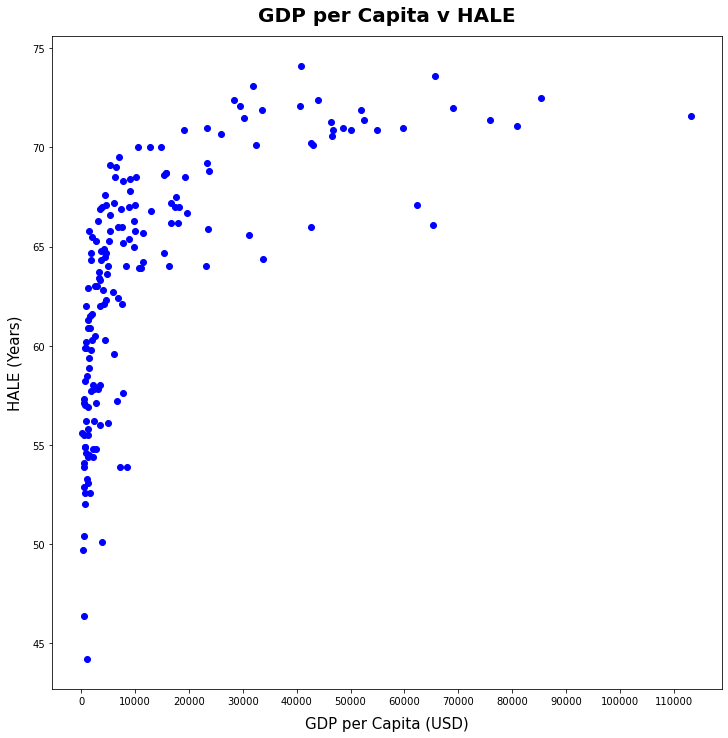

In [61]:
plt.xticks(ticks=[*range(0, 120000, 10000)])

HALE = df_hale.HALE
plt.title(('GDP per Capita v HALE'), fontsize=20, fontweight='bold', pad=15)
plt.xlabel(('GDP per Capita (USD)'), fontsize=15, labelpad=10)
plt.ylabel(('HALE (Years)'), fontsize=15, labelpad=10)
plt.scatter(x=GDP, y=HALE, color="b")

Text(0, 0.5, 'HALE (Years)')

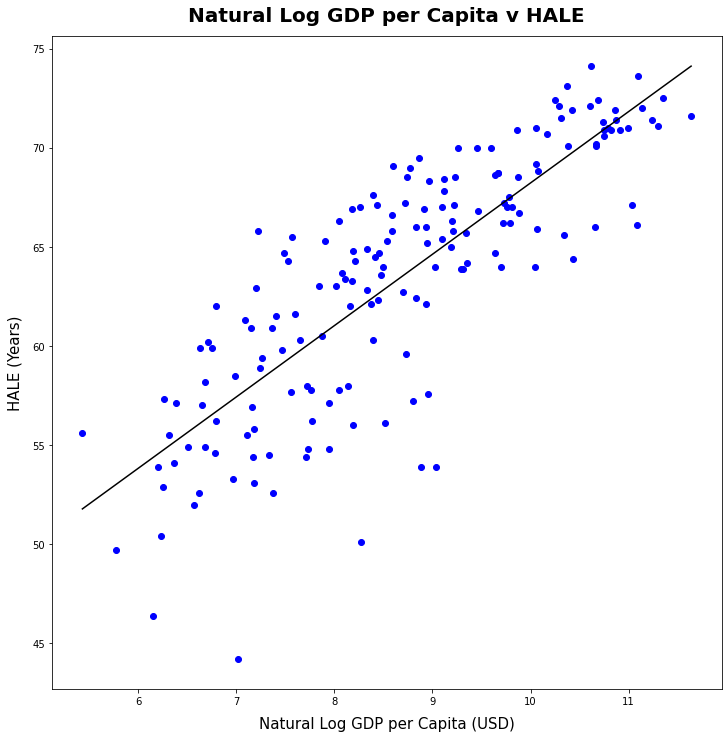

In [62]:
#a = [pow(10, i) for i in range(10)]

#fig = plt.figure()
#ax = fig.add_subplot(2, 1, 1)

#ax.set_xscale('log')

plt.plot(np.unique(log_GDP), np.poly1d(np.polyfit(log_GDP, HALE, 1))(np.unique(log_GDP)), color="black")
plt.scatter(x=log_GDP, y=HALE, color="b")

plt.rcParams["figure.figsize"]=(12,12)

#ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#bins = [500, 1000, 2500, 5000, 10000, 25000, 50000, 100000]
#plt.xticks(ticks=bins)
plt.title(('Natural Log GDP per Capita v HALE'), fontsize=20, fontweight='bold', pad=15)
plt.xlabel(('Natural Log GDP per Capita (USD)'), fontsize=15, labelpad=10)
plt.ylabel(('HALE (Years)'), fontsize=15, labelpad=10)


In [53]:
merge_all = pd.merge(merge_2, df_expect, on='country')
reorder_all = merge_all[["country", "GDP", "log_GDP", "expectancy", "HALE"]]
print(reorder_all)

                 country           GDP   log_GDP  expectancy  HALE
0            Afghanistan    494.179350  6.202899        63.2  53.9
1                Albania   5395.659532  8.593350        78.0  69.1
2                 Angola   2809.626088  7.940807        63.1  54.8
3    Antigua and Barbuda  17376.649677  9.762883        76.5  67.0
4              Argentina  10056.637940  9.215988        76.6  67.1
..                   ...           ...       ...         ...   ...
167           Uzbekistan   1784.009816  7.486619        73.0  64.7
168              Vanuatu   3116.297759  8.044401        65.3  57.8
169              Vietnam   2715.275980  7.906649        73.7  65.3
170               Zambia   1305.001031  7.173959        62.5  54.4
171             Zimbabwe   1316.740657  7.182915        60.7  53.1

[172 rows x 5 columns]


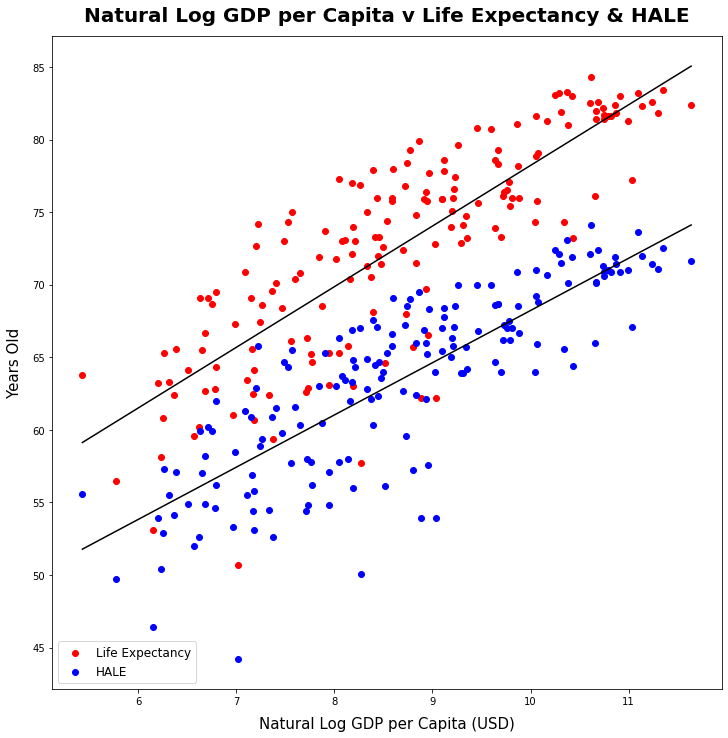

In [66]:

plt1 = plt.scatter(x=merge_all.log_GDP, y=merge_all.expectancy, color="r")
plt2 = plt.scatter(x=merge_all.log_GDP, y=merge_all.HALE, color="b")
plt.legend((plt1, plt2),
          ('Life Expectancy', 'HALE'),
           scatterpoints=1,
           loc='lower left',
           ncol=1,
           fontsize=12)
           
plt.plot(np.unique(log_GDP), np.poly1d(np.polyfit(log_GDP, expect, 1))(np.unique(log_GDP)), color="black")
plt.plot(np.unique(log_GDP), np.poly1d(np.polyfit(log_GDP, HALE, 1))(np.unique(log_GDP)), color="black")
plt.title(('Natural Log GDP per Capita v Life Expectancy & HALE'), fontsize=20, fontweight='bold', pad=15)
plt.xlabel(('Natural Log GDP per Capita (USD)'), fontsize=15, labelpad=10)
plt.ylabel(('Years Old'), fontsize=15, labelpad=10)
plt.xlabel
plt.show()